# COGS 108 - Final Project 

# Overview

Pollution negatively impacts the quality of living in a community. Specifically, communities affected by pollutants are surrounded by other social issues, such as the high unemployment rate and poor education. For example, if a community encounters serious pollution, it’s very unlikely for it to attract owners to open businesses there, which reduces the number of employees. In addition,communities with severe pollutions will cause residents with higher education to leave because they can seek better employment elsewhere. Therefore, As a result, I want to investigate whether the unemployment rate and educational level are indicators of pollution severity within a community. 

# Name & GitHub

- Name: Jialun Sun
- GitHub Username: j7sun

# Research Question

In San Diego County, do communities with a lower unemployment rate and higher educational level among residents have better environmental quality(lower CES 2.0 Score)?


## Background and Prior Work

In the field of sociology, researchers have been studying how environmental factors are related to socio-economic trends within neighborhoods. First, they discovered that air pollution has a significant impact on economic activities. Specifically, air pollution is linked to chronic health problems, such as asthma, lung cancer, and other repository illness. As a result, bad health conditions among community residents would lower their productivity and increase insurance expenditure at workplaces. Therefore, air pollution potentially increases the chance for workers to lose their job. Moreover, local governments are responsible for controlling pollution through policies that reduce emissions. Eventually, more factories are forced to close due to restrictions, which reduces the number of available jobs in a community.

Similarly, education quality is also correlated with the community’s environment.People with higher education often leave communities with serious pollution because they have less access to rewarding jobs. Also, students who live in communities with serious pollution perform worse in academics. According to a study, students from schools that are located within one mile from a TRI site(emit harmful class of pollutants) perform worse on standardized tests and have a disproportionately higher chance of being expelled. As a result, pollution reduces the chance for students to receive a education higher than high school.

1.https://www.brookings.edu/blog/jobs/2011/05/06/we-are-what-we-breathe-the-impacts-of-air-pollution-on-employment-and-productivity/
2.https://www.oecd.org/environment/indicators-modelling-outlooks/Policy-Highlights-Economic-consequences-of-outdoor-air-pollution-web.pdf
3.https://www.lung.org/clean-air/outdoors/who-is-at-risk/disparities



# Hypothesis


For this invstigation, the hypotheses are that communities in San Diego with a lower unemployment rate will also have a lower CES 2.0 score. Furthermore, less population with a education less than high school also indicates a lower CES 2.0 score. The reason for this hypothesis is that a higher unemployment rate and a lower educational level both imply the severe pollution of a community, which increases the CSE 2.0 score. In comparison, communities with a lower unemployment rate and higher educational level are likely communities with better environmental quality, which reduces the CSE 2.0 score.

# Dataset(s)

*Fill in your dataset information here*

Dataset 1: 
- Dataset Name:California environmental Health Screening Data
- Link to the dataset:https://data.ca.gov/dataset/calenviroscreen-2-0
- Number of observations: 8035

This dataset provides information on the environmental health screening score of parks in California, which is defined as a methodology to identify communities that are disproportionately burdened by multiple sources of pollution.It also includes information on unemployment rate of popluation over the age of 16. Finally, it demonstrates the percent of population over the age of 25 with less than high school education.  

# Setup

In [1]:
## YOUR CODE HERE

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
   
import seaborn as sns
sns.set(font_scale = 2.0,style = 'white')
sns.set_context('talk')

import patsy
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import shapiro

In [2]:
#Importing 
Enviro_df = pd.read_csv('../data/calenviroscreen-final-report.csv')
Enviro_df.head()

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1
0,6019001100,3174,Fresno,NaN,89.22,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.255228,80.87,14.746087,...,21.6,83.66,77.500865,97.78,19.30,92.05,90.072268,9.360658,99.60,"Fresno 93706\n(36.709695199999999, -119.7816961)"
1,6019000300,3609,Fresno,NaN,83.71,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.287130,83.28,14.619618,...,18.3,78.34,81.204032,98.93,NaN,NaN,92.323243,9.594592,99.90,"Fresno 93706\n(36.726461999999998, -119.8010347)"
2,6019000200,3167,Fresno,NaN,83.47,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.304446,84.40,14.554656,...,16.2,74.04,86.828423,99.66,25.27,98.14,91.499039,9.508958,99.80,"Fresno 93706\n(36.735491400000001, -119.8055044)"
3,6019001500,2206,Fresno,NaN,83.08,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.225687,78.25,14.937649,...,19.5,80.68,62.746088,88.32,18.30,89.60,83.474281,8.674967,97.74,"Fresno 93725\n(36.681600000000003, -119.717842..."
4,6019000600,6161,Fresno,NaN,82.95,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.327935,85.81,14.506413,...,16.9,75.49,88.680993,99.79,26.69,98.61,92.246260,9.586590,99.89,"Fresno 93721\n(36.743062999999999, -119.7933565)"


# Data Cleaning

Describe your data cleaning steps here.

In [3]:
## YOUR CODE HERE
#Sepcify the communities are located in San Diego
Enviro_df = Enviro_df[Enviro_df['California County'] == 'San Diego']

#Rename confusing columns
Enviro_df = Enviro_df.rename(columns = {'Census Tract':'id','CES 2.0 Score' : 'CES_Score'})

#Only include information needed
Enviro_df = Enviro_df[['id','California County','CES_Score','Unemployment',
                       'Education' ]]
#Drop Nan values
Enviro_df = Enviro_df.dropna(axis = 0)
Enviro_df = Enviro_df.reset_index(drop = True)
nviro_df = Enviro_df.sort_values(by = ['CES_Score'])

Enviro_df

,id,California County,CES_Score,Unemployment,Education
0,6073003601,San Diego,55.61,17.84,65.3
1,6073004900,San Diego,54.23,13.77,49.1
2,6073003902,San Diego,52.48,19.39,61.3
3,6073003901,San Diego,47.82,28.52,63.5
4,6073005100,San Diego,47.81,25.23,21.6
...,...,...,...,...,...
611,6073017053,San Diego,4.31,4.95,5.2
612,6073008102,San Diego,4.26,4.82,1.0
613,6073007907,San Diego,3.47,2.58,3.0
614,6073007301,San Diego,3.32,7.50,2.2


In [4]:
#Check the data types to make sure they are comparable
Enviro_df.dtypes

id                     int64
California County     object
CES_Score            float64
Unemployment         float64
Education            float64
dtype: object

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

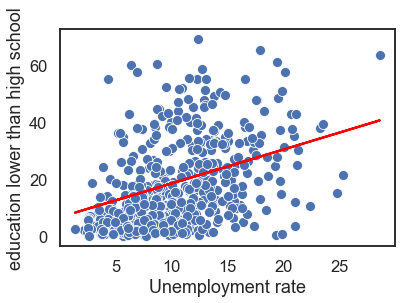

In [5]:
#Confirm that the two predictors have no mutiple colinearity
sns.scatterplot(x = 'Unemployment',y = 'Education', data = Enviro_df,s = 100)
plt.xlabel('Unemployment rate')
plt.ylabel('education lower than high school');

Enviro_df = Enviro_df.dropna(axis = 0)
m,b = np.polyfit(Enviro_df['Unemployment'],Enviro_df['CES_Score'],1)
x = Enviro_df['Unemployment']
y = m * x + b
plt.plot(x,y,color = 'red');

The visualization doesn't demonstrate that the independent variables are too highly coorelated with each other. 

In [6]:
#Confirm that the two predictors have no mutiple colinearity
Enviro_df.corr()

,id,CES_Score,Unemployment,Education
id,1.000000,-0.165926,-0.080634,-0.071347
CES_Score,-0.165926,1.000000,0.569670,0.749339
Unemployment,-0.080634,0.569670,1.000000,0.477256
Education,-0.071347,0.749339,0.477256,1.000000


Based on the standard pearson correlation intepretation, "a coefficient between 0.3 ~ 0.5 doesn't imply strong correlation". Therefore, we confirm that multicollinearity doesn't occur in our data. 

Reference: https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php

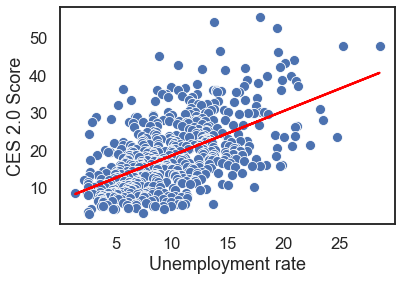

In [7]:
# Checking linear relationship between Unemployment rate and CES 2.0 score
sns.scatterplot(x = 'Unemployment',y = 'CES_Score',data = Enviro_df, s = 100)
plt.xlabel('Unemployment rate')
plt.ylabel('CES 2.0 Score');

m2,b2 = np.polyfit(Enviro_df['Unemployment'],Enviro_df['CES_Score'],1 )
x = Enviro_df['Unemployment']
y = m2 * x + b2
plt.plot(x,y,color = 'red');

In [8]:
outcome,predictors = patsy.dmatrices('CES_Score ~ Unemployment',Enviro_df)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              CES_Score   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     295.0
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           2.76e-54
Time:                        18:24:18   Log-Likelihood:                -2119.8
No. Observations:                 616   AIC:                             4244.
Df Residuals:                     614   BIC:                             4252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.6621      0.753      8.843   

The standard error of the intercept of the regression is relatively large compared to the standard error of the coefficient of unemployment. 

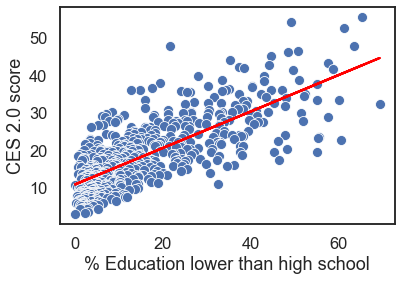

In [9]:
#Checking linear relationship
sns.scatterplot(x = 'Education',y = 'CES_Score',data = Enviro_df, s = 100)
plt.xlabel('% Education lower than high school')
plt.ylabel('CES 2.0 score');

m3,b3 = np.polyfit(Enviro_df['Education'],Enviro_df['CES_Score'],1 )
x = Enviro_df['Education']
y = m3 * x + b3
plt.plot(x,y,color = 'red');

In [10]:
outcome,predictors = patsy.dmatrices('CES_Score ~ Education',Enviro_df)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              CES_Score   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     786.3
Date:                Wed, 16 Dec 2020   Prob (F-statistic):          5.18e-112
Time:                        18:24:18   Log-Likelihood:                -1986.7
No. Observations:                 616   AIC:                             3977.
Df Residuals:                     614   BIC:                             3986.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9352      0.365     29.982      0.0

The standard error of the intercept of the regression is relatively large compared to the standard error of the coefficient of Education.

In [11]:
outcome,predictors = patsy.dmatrices('CES_Score ~ Unemployment + Education',Enviro_df)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              CES_Score   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     499.5
Date:                Wed, 16 Dec 2020   Prob (F-statistic):          1.98e-129
Time:                        18:24:18   Log-Likelihood:                -1942.8
No. Observations:                 616   AIC:                             3892.
Df Residuals:                     613   BIC:                             3905.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5541      0.566     11.585   

CES 2.0 Score = 0.5746 * Unemployment + 0.4009 * Education + 6.5541

The Standard Error in this regression becomes smaller. In addition, the intercept value becomes smaller as well. Therefore, Education and unemployment rate are two independent variables,which are comparible, to affect the level of CES 2.0 Score.

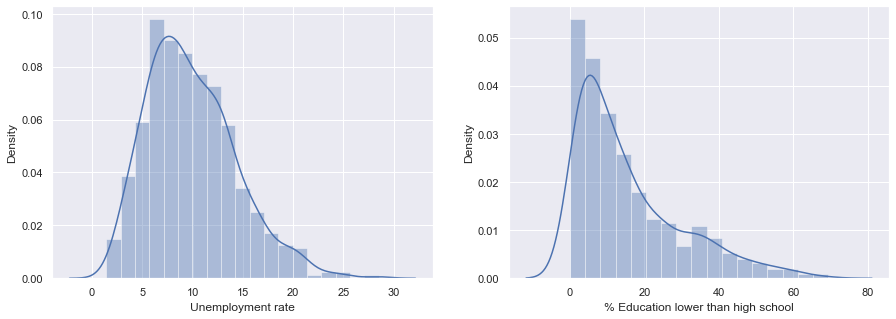

In [12]:
#Checking distribution

sns.set(rc = {"figure.figsize":(15,5)})

plt.subplot(1,2,1)
sns.distplot(Enviro_df['Unemployment'])
plt.xlabel('Unemployment rate')


plt.subplot(1,2,2)
sns.distplot(Enviro_df['Education'])
plt.xlabel('% Education lower than high school');

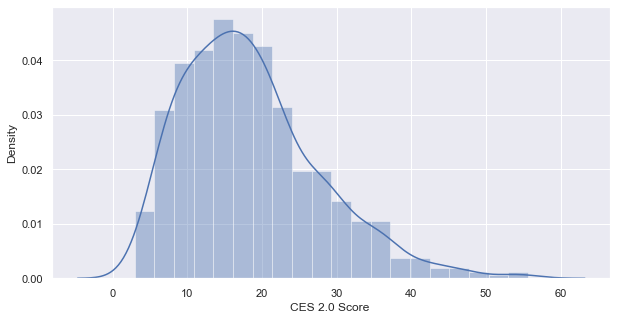

In [13]:
#Checking distribution
sns.set(rc = {"figure.figsize":(10,5)})
sns.distplot(Enviro_df['CES_Score'])
plt.xlabel('CES 2.0 Score ');

From visualization, we know that the distribution for the independent variable "Education" is skewed to the right. The distribution of the other two varibales are not so skewed like the distribution of "Education".

In [14]:
#Shapiro-Wilk Normality Test
stat,p_value = shapiro(Enviro_df['Unemployment'])

if p_value > 0.05:
    print('Nomal distribution')
else:
    print('Varibale distribution not normal')

Varibale distribution not normal


In [15]:
#Shapiro-Wilk Normality Test
stat,p_value = shapiro(Enviro_df['CES_Score'])
if p_value > 0.05:
    print('Nomal distribution')
else:
    print('Varibale distribution not normal')

Varibale distribution not normal


In [16]:
#Log Transformation
Enviro_df['Unemployment_log'] = np.log(Enviro_df['Unemployment'])
Enviro_df['Education_log'] = np.log(Enviro_df['Education'])
Enviro_df['CES_Score_log'] = np.log(Enviro_df['CES_Score'])

Enviro_df.head()

,id,California County,CES_Score,Unemployment,Education,Unemployment_log,Education_log,CES_Score_log
0,6073003601,San Diego,55.61,17.84,65.3,2.881443,4.178992,4.018363
1,6073004900,San Diego,54.23,13.77,49.1,2.622492,3.893859,3.993234
2,6073003902,San Diego,52.48,19.39,61.3,2.964757,4.115780,3.960432
3,6073003901,San Diego,47.82,28.52,63.5,3.350606,4.151040,3.867444
4,6073005100,San Diego,47.81,25.23,21.6,3.228034,3.072693,3.867235


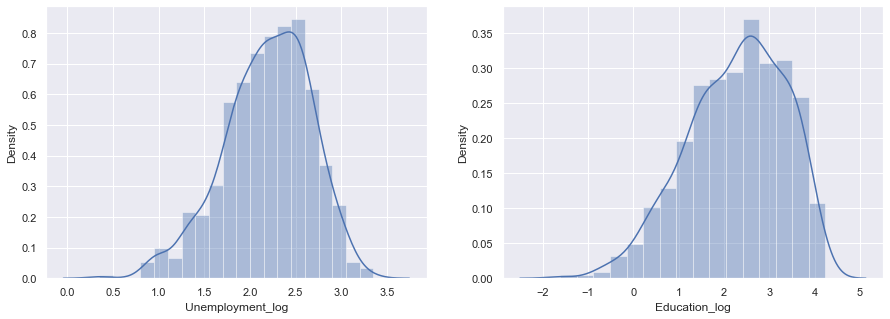

In [17]:
#Visualization after log transformation
Enviro_df = Enviro_df.replace([np.inf, -np.inf], np.nan)
sns.set(rc = {"figure.figsize":(15,5)})
plt.subplot(1,2,1)
sns.distplot(Enviro_df['Unemployment_log'])

plt.subplot(1,2,2)
sns.distplot(Enviro_df['Education_log']);

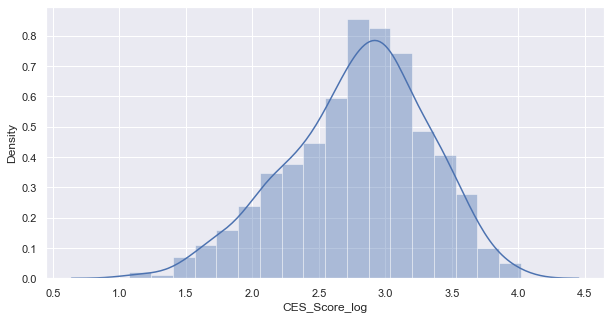

In [18]:
#Visualization after log transformation
sns.set(rc = {"figure.figsize":(10,5)})
sns.distplot(Enviro_df['CES_Score_log']);

Based on the visualization, compared to the original distributions of the three variables, the log transformation of variables are more close to normal distribution. 

We noticed that the raw dataset has 616 observations in total. When the sample size is larger than 200, normality assumption is not needed. 

Reference: https://www.statisticssolutions.com/normality/

# Regression Analysis

In [19]:
outcome,predictors = patsy.dmatrices('CES_Score_log ~ Unemployment_log + Education_log',Enviro_df)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          CES_Score_log   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     404.2
Date:                Wed, 16 Dec 2020   Prob (F-statistic):          1.50e-112
Time:                        18:24:19   Log-Likelihood:                -211.72
No. Observations:                 614   AIC:                             429.4
Df Residuals:                     611   BIC:                             442.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5212      0.066  

In [20]:
outcome,predictors = patsy.dmatrices('CES_Score_log ~ Unemployment + Education_log',Enviro_df)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          CES_Score_log   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     413.5
Date:                Wed, 16 Dec 2020   Prob (F-statistic):          2.71e-114
Time:                        18:24:19   Log-Likelihood:                -207.69
No. Observations:                 614   AIC:                             421.4
Df Residuals:                     611   BIC:                             434.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.8227      0.038     48.357

In [21]:
outcome,predictors = patsy.dmatrices('CES_Score_log ~ Unemployment + Education',Enviro_df)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          CES_Score_log   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     365.5
Date:                Wed, 16 Dec 2020   Prob (F-statistic):          3.15e-105
Time:                        18:24:19   Log-Likelihood:                -234.91
No. Observations:                 616   AIC:                             475.8
Df Residuals:                     613   BIC:                             489.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1297      0.035     60.234   

The standard error of the intercept, Unemployment and Education in this model is the smallest compared to the standard error in other regression models. Moreover, because the sample size of our dataset is large enough,the normality assumption is not needed for this regression model. According to the the Central Limit Theorm, "when the sample size is sufficiently large (>200), the normality assumption is not needed.

Reference:https://www.statisticssolutions.com/normality/

# Intepretation

log(CES_Score) = 2.1297 + 0.0341(Unemployment) + 0.0206(Education)

or CES_Score = 134.80 * (unemployment)^0.0314 * (Education)^0.0206

where CES_Score is CES 2.0 Score; Unemployment is the percent of population over the age of 16 that is unemployed; Education is the percent of population over the age of 25 with a education less than high school.
     
     
If Unemployment rate and percent of Education less than high school are both 0, the CES 2.0 Score would be 0. This is a hypothetical case for the CSE 2.0 Score.

Hold Education constant, 1 unit increase in Unemployment rate will cause 0.0341 unit increase in log(CES 2.0 Score); 

Hold Unemploytment rate constant, 1 unit increase Education will cause 0.0206 unit increase in log(CES 2.0 Score).

# Ethics & Privacy

We are permitted to use this dataset being provided by professor Ellis on the final project. Also, the link attached to the dataset shows that this data has no restriction on public use. Since the Census tract id corresponds to communities, instead of individuals, I don't think that there is a particular privacy concern regards my dataset. However, the dataset is subjective to human bias, depending on the collector. For example, different collectors have a different standard for language proficiency. One collector could define speech fluency as proficiency in English, while others evaluate proficiency differently. Therefore, to prevent human biases, I removed the column of "Linguistic isolation" from my dataset since it's unrelated to my research. 

Besides human bias, I will also note a potential ethical concern regarding my dataset. My analysis showed that pollution is also connected to socio-economic issues, which are the unemployment rate and level of education. Therefore, some people might misinterpret my result and claim that unemployed people and people with lower education levels are the only groups to be blamed for pollution problems within a community. However, the purpose of my analysis is not to develop hatred toward a particular group. Instead, the main point of my analysis is to demonstrate the relationship between environmental quality and socio-economic factors. 

# Conclusion & Discussion

The purpose of this project is to find the relationship between the CES 2.0 score and a couple of socio-economic factors, which are the unemployment rate and educational level. In my hypothesis, I assumed that communities with lower better environmental quality are also communities with a lower unemployment rate and lower percent of the population having an education less than high school. Based on the result from the non-linear multiple regression model, I was able to demonstrate that when the unemployment rate or percent of the population with education less than high school increases, the CES 2.0 score also increases. Therefore, my hypothesis is valid. 

Although I was able to prove my hypothesis, there are still limitations to my project. First, my dataset is region-selective since I only analyzed communities within San Diego County. Therefore, the result of this project might not necessarily apply to other communities across California. Furthermore, according to the link attached to my dataset, the data were last uploaded in August 2019. As a result, there is a chance that the result of my analysis cannot apply to the year 2020. The reason is that in the majority of 2020, we are impacted by a global pandemic. Lockdowns and stay-at-home order could become confounding factors that affect the pollution within a community.

The analysis from this project could impact public policies. In order to increase environmental qualities, two strategies could be considered. First, the government could implement policies that aim to help communities with the lowest unemployment rate. In addition, providing educational resources to communities with lower education levels through government funding could also effectively reduce pollution.